**PRAKTIKUM KE-6**
Tanggal: 24 11 2022

 * Nama : Tesalonika Permatasari Hutapea
 * Nim  : 10121052

In [ ]:
# Import modul yang akan digunakan di sel ini

import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import colors

#0. **Output Kedua Program**


*   [Chernobyl](https://giphy.com/gifs/YYtd6LiyUq5lhXwemJ)
*   [Black Summer]( https://giphy.com/gifs/r2DzT2Z9iw8LxK4hYs)



#1. **Chernobyl 1986 ☢**

Suara menggelegar membangungkan semua orang di Kota Pripyat pada pagi buta hari itu. Ya, yang ditakutkan semua orang akhirnya terjadi – salah satu reaktor di stasiun nuklir Chernobyl mengalami ledakan. Alhasil, ratusan ribu orang harus dievakuasi agar tidak terpapar zat-zat radioaktif seperti Ce-137 dan Sr-90. Kota Pripyat menjadi kota mati dalam sekejap, termasuk kehidupan di Sungai Pripyat.

Kita akan coba simulasikan penyebaran radioaktif di Sungai Pripyat hari itu dengan ketentuan berikut:
* Asumsikan Sungai Pripyat sebagai array berukuran 50x10 (panjang x lebar).
* Tingkat pencemaran sungai akibat radioaktif diukur menggunakan skala 0 sampai 5, dengan 5 menandakan pencemaran paling parah.
* Tingkat pencemaran sungai di akhir hari merupakan penjumlahan dari 25% tingkat pencemaran sel tersebut, 12.5% tingkat pencemaran bagian utara, timur, selatan, dan barat sel, serta 6.25% tingkat pencemaran bagian barat laut, timur laut, tenggara, dan barat daya sel di akhir hari sebelumnya.
* Gunakan reflecting boundary condition.
* Pada kali pertama ledakan, tingkat pencemaran sungai ditunjukkan menurut gambar berikut.
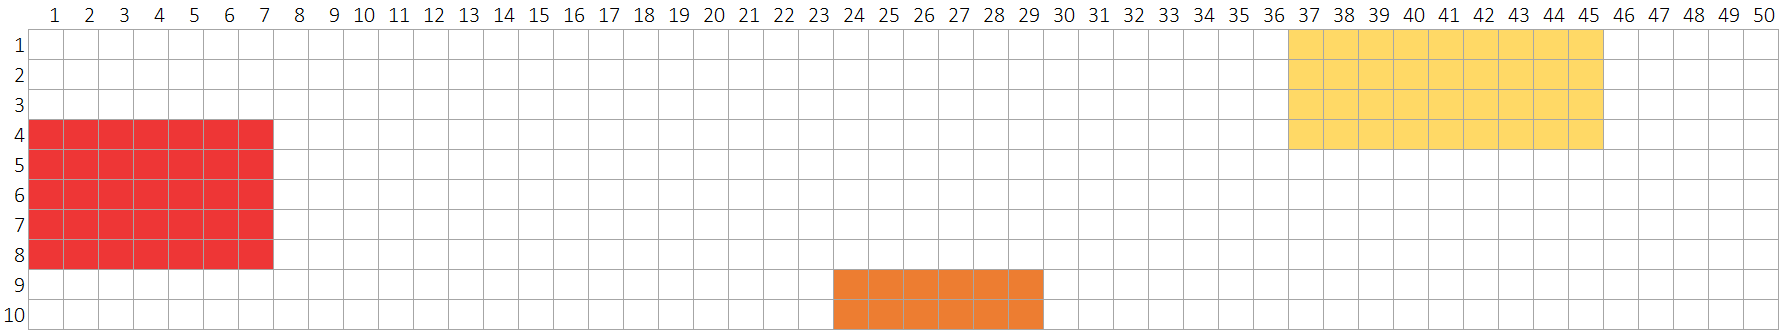

* Warna merah menandakan tingkat pencemaran 5, warna *orange* menandakan tingkat pencemaran 4, dan warna kuning menandakan tingkat pencemaran 3. Sel yang tidak berwarna berarti sungai tidak tercemar.

a. Buatlah grid kondisi awal sungai saat pertama kali terjadi ledakan. Tampilkan dengan grafik heatmap!

*Note: kalau mau estetik boleh gunakan ketentuan berikut*
```
fig = plt.figure(figsize=(12.5,2.5))
cmap='coolwarm', vmin=-2, vmax=5, xtiocklabels=False, yticklabels=False, cbar=False
```



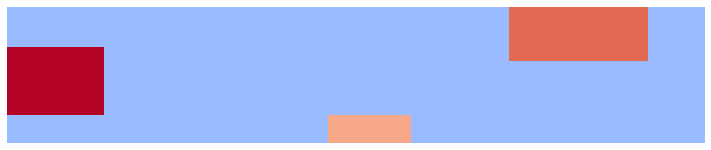

In [ ]:
RED = 5
ORANGE = 4
YELLOW = 3
NONE = 0

matriks = [[0 for i in range(50)] for j in range(10)]


#Inisiasi matriks
for j in range(36,46):
  for i in range(4):
    matriks[i][j] = ORANGE

for j in range(7):
  for i in range(3,8):
    matriks[i][j] = RED

for j in range(23,29):
  for i in range(8,10):
    matriks[i][j] = YELLOW

# Plot heatmap
fig = plt.figure(figsize=(12.5,2.5))
ax = sns.heatmap(matriks, cmap='coolwarm', vmin=-2, vmax=5, xticklabels=False, yticklabels=False, cbar=False)


b. Buat fungsi `reflecting` yang menerima suatu grid sebagai masukan, dan mengeluarkan grid yang di-*extend* sebesar satu sel di semua arah dengan *reflecting boundary conditions*. Untuk menguji apakah fungsi yang dibangun sudah benar, terapkan fungsi `reflecting` tersebut terhadap grid sungai awal yang Anda buat di butir (a)!

Reflecting boundary:


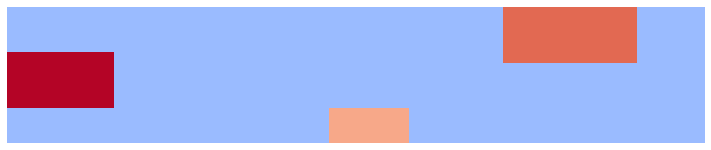

In [ ]:
rand1 = 50
rand2 = 10

#periodic
new_2 = [[0 for i in range(rand1+2)] for j in range(rand2+2)] #indeks maks ada di rand+1
for j in range(1,rand1+1):
  for i in range(1,rand2+1):
    new_2[i][j] = matriks[i-1][j-1]

for j in range(rand1+2):
  if(j==0):
    new_2[0][j] = matriks[0][0] #pojok kiri atas
    new_2[rand2+1][j] = matriks[rand2-1][0] #pojok kiri bawah
  elif(j==rand1+1):
    new_2[0][j] = matriks[0][rand1-1] #pojok kanan atas
    new_2[rand2+1][rand1+1] = matriks[rand2-1][rand1-1] #pojok kanan bawah
  else :
    new_2[0][j] = matriks[0][j-1] #barikade atas kecuali pojok
    new_2[rand2+1][j] = matriks[rand2-1][j-1] #barikade bawah kecuali pojok

for i in range(1,rand2+1):
  new_2[i][0] = matriks[i-1][0] #barikade samping kecuali pojok
  new_2[i][rand1+1] = matriks[i-1][rand1-1] #barikade samping kecuali pojok


print("Reflecting boundary:")

# Plot heatmap
fig = plt.figure(figsize=(12.5,2.5))
ax = sns.heatmap(new_2, cmap='coolwarm', vmin=-2, vmax=5, xticklabels=False, yticklabels=False, cbar=False)

c. Buat fungsi `diffusion` yang mengeluarkan nilai akhir suatu sel setelah berdifusi

*Hint: apa saja inputnya?*

In [ ]:
def spread(site, N, E, S, W, BL, TL, TG, BD):
  site = 0.25*site + 0.125*(N + E + S + W) + 0.0625*(BL + TL + TG + BD)
  return site


def neww(matriks):
  for j in range(1,rand1+1):
    for i in range(1,rand2+1):
      site = new_2[i][j]
      N = matriks[i - 1][j]
      E = matriks[i][j + 1]
      S = matriks[i + 1][j]
      W = matriks[i][j - 1]
      BL = matriks[i - 1][j - 1]
      TL = matriks[i - 1][j + 1]
      TG = matriks[i + 1][j + 1]
      BD = matriks[i + 1][j - 1]
      new_2[i-1][j-1] = spread(site, N, E, S, W)
  return new_2



d. Buat fungsi `simul` yang melakukan satu kali "iterasi" dari simulasi

*Hint: apa outputnya?*

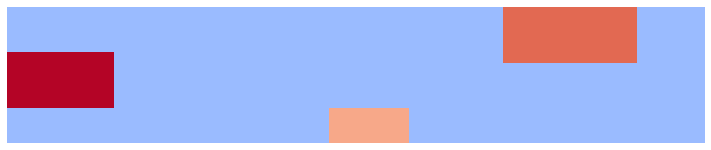

In [ ]:
def spread(site, N, E, S, W, BL, TL, TG, BD):
  site = 0.25*site + 0.125*(N + E + S + W) + 0.0625*(BL + TL + TG + BD)
  return site


def neww(matriks):
  for j in range(1,rand1+1):
    for i in range(1,rand2+1):
      site = new_2[i][j]
      N = matriks[i - 1][j]
      E = matriks[i][j + 1]
      S = matriks[i + 1][j]
      W = matriks[i][j - 1]
      BL = matriks[i - 1][j - 1]
      TL = matriks[i - 1][j + 1]
      TG = matriks[i + 1][j + 1]
      BD = matriks[i + 1][j - 1]
      new_2[i-1][j-1] = spread(site, N, E, S, W, BL, TL, TG, BD)
  return new_2

# Plot heatmap
fig = plt.figure(figsize=(12.5,2.5))
ax = sns.heatmap(new_2, cmap='coolwarm', vmin=-2, vmax=5, xticklabels=False, yticklabels=False, cbar=False)

e. Lakukan simulasi selama 60 hari!

*Untuk membantu Anda membuat animasi, disarankan untuk menyimpan hasil simulasi per harinya dalam suatu array.*

In [ ]:
time = 60

def play(time):
  new_2 = matriks

  grids = np.zeros((time+1, 10, 50))
  grids[0][:][:] = matriks #saat t=0, new_2 = matriks
  for i in range(1, time+1):
    new_2 = neww(matriks)
    grids[i][:][:] = matriks
  return grids

for i in range(60):
  print(neww(matriks))


f. Buat animasi dari hasil simulasi!

In [ ]:
final=play(time)

# Menyiapkan figure, heatmap
fig = plt.figure()

# Fungsi init
def init():
  plt.clf()
  return None

# Fungsi iterasi animasi
def animate(i):
  plt.clf()
  ax = sns.heatmap(final[i-1],
                   vmin=0,
                   center=1,
                   vmax=2,
                   cmap="Reds",
                   square=True,
                   xticklabels=False,
                   yticklabels=False,
                   )


# Fungsi init
anim = animation.FuncAnimation(fig,
                               animate,
                               frames=range(1, time+1, 1),
                               blit=False,
                               interval=250,
                               init_func=init)

# Kode tambahan jika dijalankan di colab/jupyter
from matplotlib import rc
from IPython.display import HTML
rc('animation', html='jshtml')
anim


#2. $Black$ $Summer$ (Australia 2019 - 2020)

Black Summer merupakan fenomena kebakaran hutan di berbagai penjuru Australia. Tragedi ini terukir dalam sejarah sebagai musim kebakaran hutan terburuk di Dunia. Bukan tanpa sebab, total kerusakan lahan diperkirakan mencapai 186 juta hektare. Salah satu penyebab utama peristiwa ini ialah perubahan iklim yang ekstrim  di wilayah Australia.  

Sudah 2 tahun berlalu, pemerintah Australia masih kesulitan dalam menentukan titik awal kebakaran serta wilayah hutan yang rentan terbakar secara tiba-tiba. Anda sebagai ahli matematika mengajukan diri untuk merekontruksi ulang peristiwa Black Summer di Australia.

Pemerintah Australia menyediakan berbagai *Basic Coding* atau *Template* yang dapat anda gunakan secara langsung. Fokuslah dalam membangun Algoritma *Function* dan Simulasi !

In [ ]:
# Seed
np.random.seed(69420)

# Dimensi Matriks
m = 50; n = 50

# Deklarasi Grid
Environment = np.zeros(shape=(m+2,n+2))
Rand_Matriks = np.random.rand(m+2,n+2)

# Var
RIVER = 3
BURNING = 2
TREE = 1
EMPTY = 0

# Probability Awal
probTree = 0.1
probBurning = 0.075 ;

# cmap
forest_map = colors.LinearSegmentedColormap.from_list('forest_map', ["black","green","red","lightblue",'yellow'])

### a. Bangun suatu fungsi `Init_Forest` dan `Perodic_Boundary` dengan kriteria sebagai berikut:

Function `Init_Forest` dengan Input :

*   **m**, Dimensi Baris pada Grid.
*   **n**, Dimensi Kolom pada Grid.
*   **Environment**, Grid Lingkungan dengan dimensi (m+2) x (n+2)
*   **ProbTree**, Probabilitas suatu grid memuat pohon dalam kondisi awal.
*   **ProbBurning**, Probabilitas suatu grid terbakar dalam kondisi awal.

Key Points :
1.   Suatu cell yang BURNING harus memuat TREE terlebih dahulu.
2.   Andaikan suatu cell tidak memuat TREE ataupun BURNING, maka cell tersebut EMPTY.
3.   Bangun RIVER pada **Environment** Baris ke-10 dan Kolom ke-20.

Output : **Environment** hutan yang diinisiasi !

*Hint* : Gunakan `np.random.random()` untuk *generate* peluang acak.

AxesSubplot(0.125,0.125;0.62x0.755)


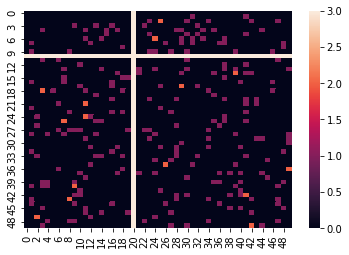

In [ ]:
def Init_Forest(m,n,Environment,probTree,probBurning):
  Environment = np.zeros((m,n))
  for i in range(1,m):
    for j in range (1,n):
      rand = np.random.random()
      if rand < probTree :
        Environment[i][j] = TREE
        rand2 = np.random.random()
        if rand2 < probBurning:
          Environment[i][j] = BURNING
      else:
        Environment[i][j] = EMPTY
  Environment[10] = RIVER
  Environment[:,20] = RIVER
  return Environment
print(sns.heatmap(Init_Forest(m,n,Environment,probTree,probBurning)))

Function `Periodic_Boundary` dengan Input:

*   **m**, Dimensi Baris pada Grid.
*   **n**, Dimensi Kolom pada Grid.
*   **Environment**, Grid Lingkungan dengan dimensi (m+2) x (n+2)

Output : **Environment** hutan dengan *Periodic Boundary* !


AxesSubplot(0.125,0.125;0.62x0.755)


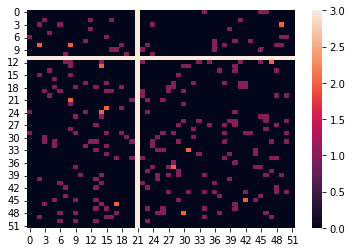

In [ ]:
def Periodic_Boundary(m,n,Environment):
  Environment = [[0 for i in range(m+2)] for j in range(n+2)]
  for j in range(1,m+1):
    for i in range(1,n+1):
      Environment[i][j] = Init_Forest(m,n,Environment,probTree,probBurning)[i-1][j-1]

  for j in range(m+2):
    if(j==0):
      Environment[0][j] = Init_Forest(m,n,Environment,probTree,probBurning)[n-1][m-1] #pojok kiri atas
      Environment[n+1][j] = Init_Forest(m,n,Environment,probTree,probBurning)[0][m-1] #pojok kiri bawah
    elif(j==m+1):
      Environment[0][j] = Init_Forest(m,n,Environment,probTree,probBurning)[n-1][0] #pojok kanan atas
      Environment[n+1][m+1] = Init_Forest(m,n,Environment,probTree,probBurning)[0][0] #pojok kanan bawah
    else :
      Environment[0][j] = Init_Forest(m,n,Environment,probTree,probBurning)[n-1][j-1] #barikade atas kecuali pojok
      Environment[n+1][j] = Init_Forest(m,n,Environment,probTree,probBurning)[0][j-1] #barikade bawah kecuali pojok

  for i in range(1,m+1):
    Environment[i][0] = Init_Forest(m,n,Environment,probTree,probBurning)[i-1][m-1] #barikade samping kecuali pojok
    Environment[i][m+1] = Init_Forest(m,n,Environment,probTree,probBurning)[i-1][0] #barikade samping kecuali pojok

  return Environment

print(sns.heatmap(Periodic_Boundary(m,n,Environment)))


Gunakan kedua fungsi tersebut untuk memperbaharui variabel **Environment** dan **Rand_Matriks**.

Key Points : Suatu cell pada **Rand_Matriks** akan memiliki *value* jika dan hanya jika cell pada **Environment** EMPTY.

Andaikan Key Points tak terpenuhi, isi cell **Rand_Matriks** dengan `0`.


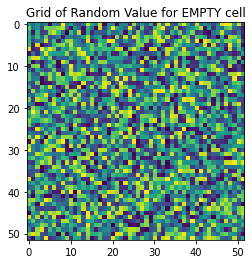

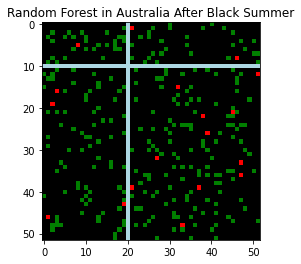

In [ ]:
Environment =  Init_Forest(m,n,Est_map,vmin=0,vmax=4)
plt.show()nvironment,probTree,probBurning)

plt.title("Grid of Random Value for EMPTY cell")
plt.imshow(Rand_Matriks)
plt.show() ; print()

plt.title("Random Forest in Australia After Black Summer")
plt.imshow(Environment,cmap=fore

Berkat bantuan Anda, pemerintah Australia memahami kondisi hutan terkini setelah tragedi Black Summer. Oleh karena itu, mereka meminta anda melanjutkan simulasi penyebaran api, tapi terbalik!

Anda diminta merekontruksi ulang kejadian tersebut hingga ditemukan titik awal api dan kondisi awal hutan sebelum terjadi tragedi Black Summer. Mengingat Anda merupakan seseorang yang gigih dan menikmati tantangan, Anda menyanggupi permintaan tersebut.

## b. Bangun suatu fungsi `Detection` dengan kriteria sebagai berikut:

Catatan : Ingat bahwa Anda merekontruksi ulang kejadian penyebaran api secara terbalik. Oleh karena itu, kami sarankan Anda membaca dan memahami prosedur yang akan kami sampaikan dengan Baik.

Function `Detection` dengan Input :

*   **site**, **Environment** Grid
*   **rand_matriks**, **Rand_Matriks** Grid.
*   **i**, Index Baris ke-i dari Grid.
*   **j**, Index Kolom ke-j dari Grid.

Interesting Facts :  
1.   Terdapat parameter `wind` dalam simulasi. Diketahui bahwa peristiwa Black Summer terjadi dengan arah angin menuju W, NW, N.
2.   Value cell `rand_matriks` merupakan peluang cell tersebut terbakar.

Key Points :

1.   Definisikan ketetanggaan suatu cell `site[i][j]` dengan **Ketetanggaan Moore**.
2.   Deklarasi Variabel `probImmune` dengan mengambil value cell `rand_matriks[i][j]`.
3.   Parameter `wind` mempengaruhi simulasi. Andaikan Sesuai, maka definisikan `wind` dengan peluang 0.9 , bila tidak, 0.1.
4.   Jika terdapat cell tetangga yang BURNING dan peluang `probImmune` serta peluang `wind` terpenuhi, maka keluarkan `output` True.
Selain itu juga, Reset value cell `rand_matriks[i][j]` menjadi nol.

Output : *Boolean Value*, True or False!

*Hint* : Pastikan kembali *conditional* apa saja yang harus terpenuhi, Hati-hati terbalik !

In [ ]:
i = 52
j = 52
wind = 0.9

def Detection(site,rand_matriks,i,j):
  site = Environment[i][j]
  for m in range(i):
    for n in range(j):
      if site = BURNING :
        if rand_matriks[i][j] < wind :
          site = TRUE


  return output


##c. Bangun iterasi yang mensimulasikan rekontruksi tragedi Black Summer! Animasikan!

Berikut merupakan penjelasan terkait simulasi serta penggunaan function yang telah anda bangun pada bagian (b).

*   Simulasi terjadi dalam 30 hari.
*   Andaikan terdapat **Environment** cell EMPTY, maka `Detection` berjalan. Jika True merupakan output fungsi `Detection`, maka isi cell **Past_Environment** menjadi BURNING.
*   Andaikan terdapat **Environment** cell BURNING maka ubah cell **Past_Environment** menjadi TREE.
*   Jangan lupa update **Environment** dengan **Past_Environment** dan `Periodic_Boundary`.

In [ ]:
Past_Environment = np.copy(Environment);

# Array Animasi
Data = [Environment]

lengthSimul = #..<Silahkan Isi Disini>..
for k in range (0): #..<Silahkan Isi Disini>..
  for i in range (0): #..<Silahkan Isi Disini>..
    for j in range (0): #..<Silahkan Isi Disini>..

      #..<Silahkan Isi Disini>..

  if 0: #..<Silahkan Isi Disini>..
    #..<Silahkan Isi Disini>..
  #..<Silahkan Isi Disini>..
  Data.append(Environment)

In [ ]:
# Animasi

fig = plt.figure(figsize=(4,4))
def animate(i):
    data = Data[i]
    sns.heatmap(data, vmin=0, vmax=4, cbar=False, cmap=forest_map)

anim = animation.FuncAnimation(fig, animate, interval=45, frames=lengthSimul, repeat=False)
from matplotlib import animation

from matplotlib import rc
from IPython.display import HTML
rc('animation', html='jshtml')
anim